In [76]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import graphviz

In [2]:
dataset=pd.read_csv("titanic_clean.csv", sep=",")

def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data.replace({'Embarked':{'S': 0,'C':1,'Q':2}},inplace=True)
 
    
    return new_data
data=preprocess_data(dataset)

In [3]:
le=preprocessing.LabelEncoder()
le.fit(data['Cabin'])
data['Cabin']=le.transform(data['Cabin'])

In [67]:

x=data.drop(["Survived", "Name", 'Cabin', "Ticket"], axis=1)
y= data["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10,stratify=y)


model_tree = tree.DecisionTreeClassifier(criterion='gini',splitter='best')  
model_tree.fit(x_train, y_train)   
y_pred=model_tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.711864406779661


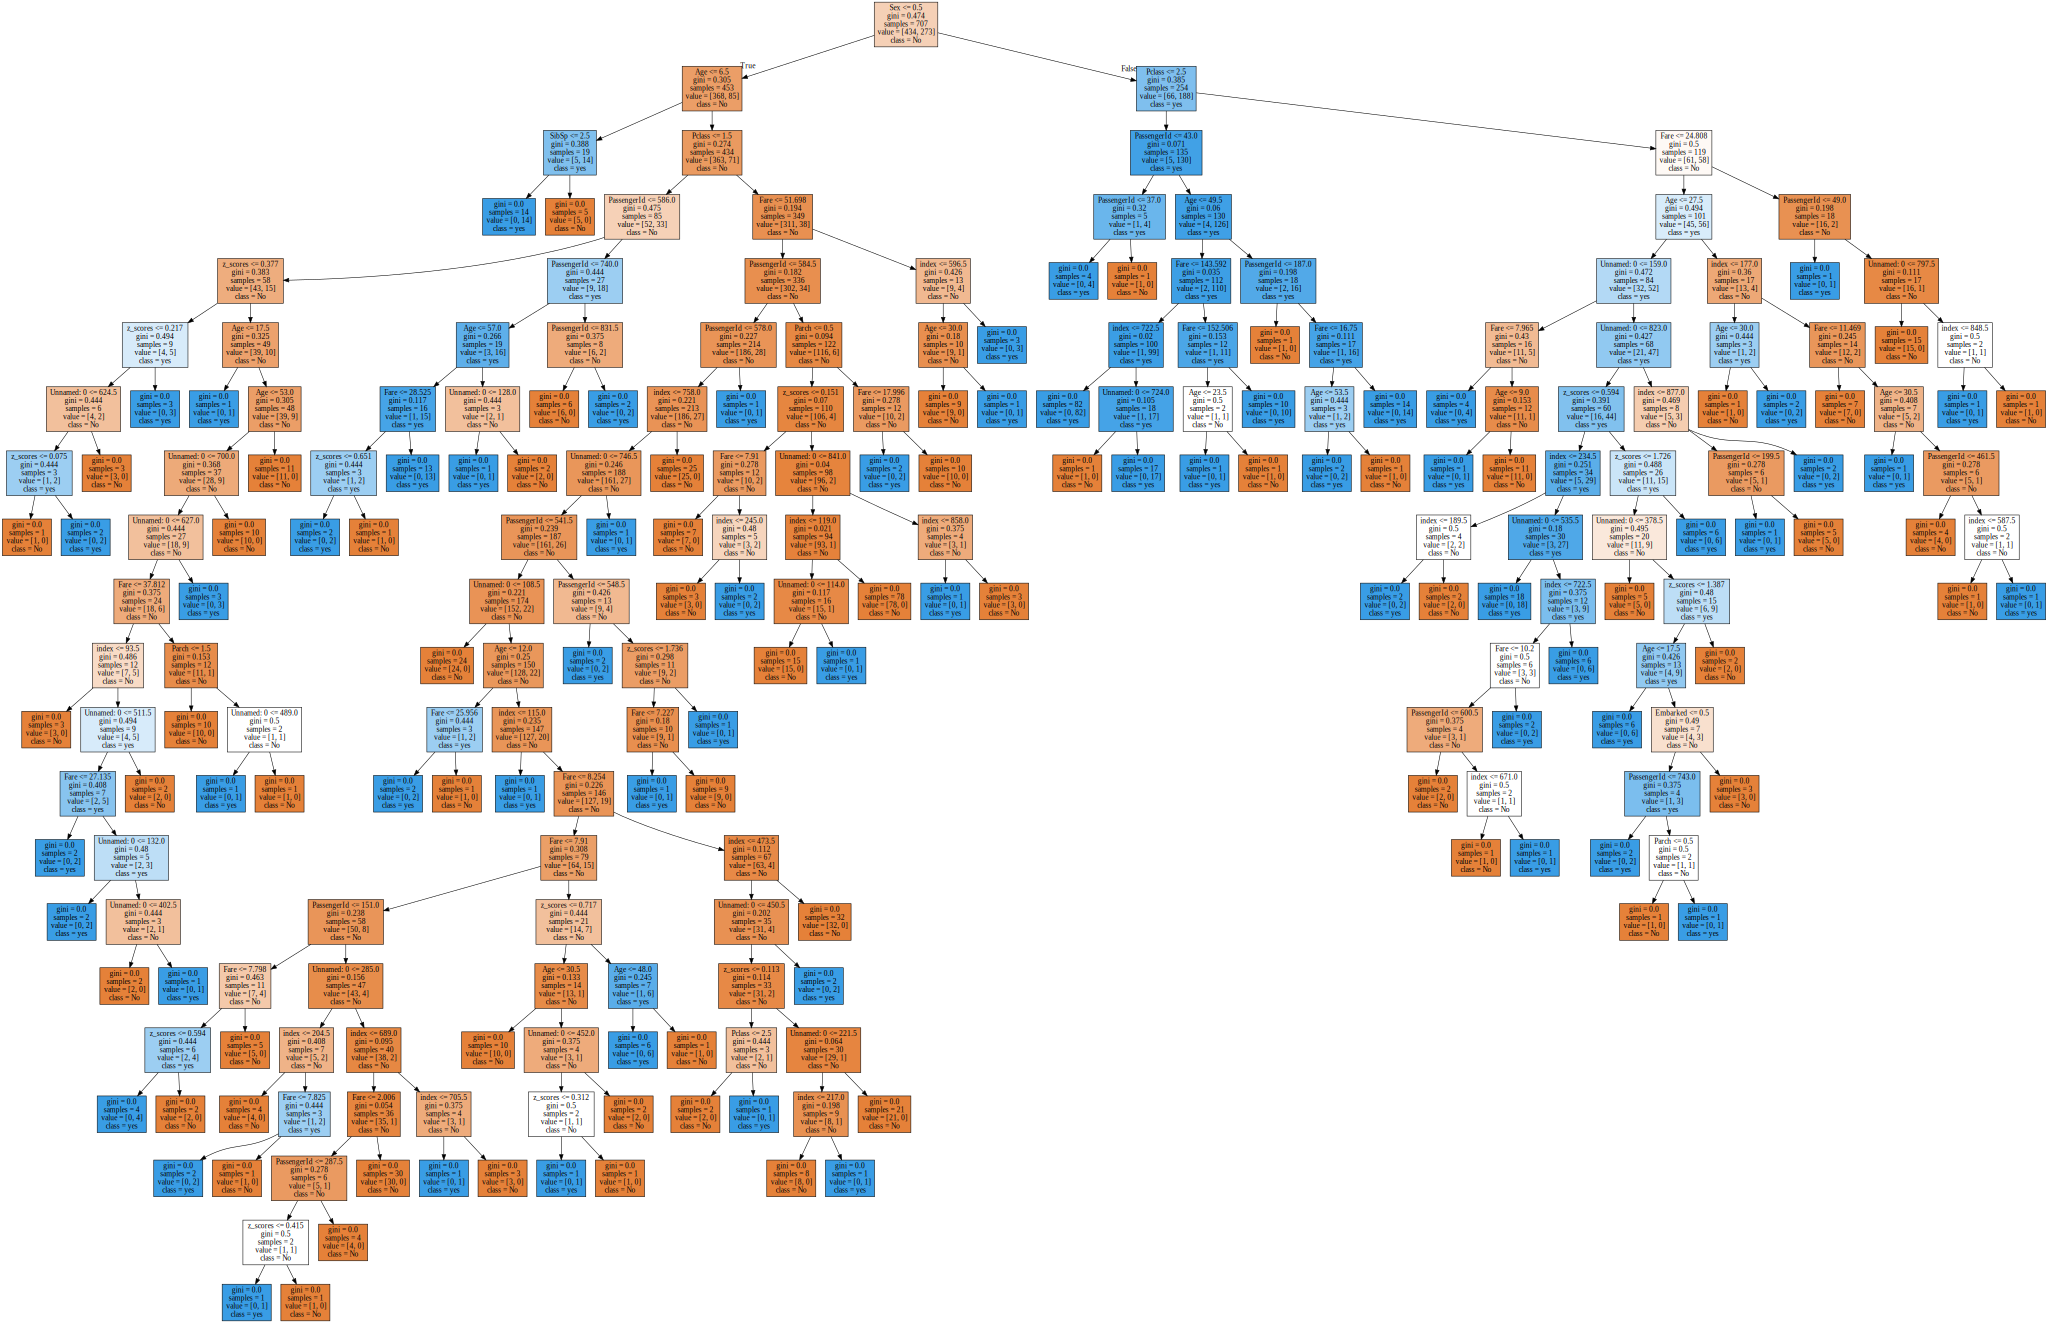

In [68]:

dot_data=tree.export_graphviz(model_tree,out_file=None,feature_names=list(x.columns),class_names = ["No","yes"],filled=True)
graph = graphviz.Source(dot_data)
graph.render('data')
graph

In [27]:
#Gridsearch
parameters={'criterion':('gini', 'entropy'),'splitter':('best','random'),'max_depth':(None,[1,140]),
            'min_samples_split':[1,10],'min_samples_leaf':[1,10]}
model_tree_gs=GridSearchCV(model_tree,parameters)
result=model_tree_gs.fit(x_train,y_train)
print(result.best_score_)
print(result.best_params_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 285, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'list' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Det

0.7933972630106882
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'random'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The s

In [28]:
#0.7933972630106882
#{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'random'}

In [71]:
model_tree = tree.DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_leaf= 10,min_samples_split= 10)  
model_tree.fit(x_train, y_train)   
y_pred=model_tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8022598870056498


In [74]:
import pickle
filename='best_model_tree.sav'
pickle.dump(model_tree, open(filename, 'wb'))

In [75]:
loaded_model_tree = pickle.load(open(filename, 'rb'))
result = loaded_model_tree.score(x_test, y_test)
print(result)

0.8022598870056498


In [88]:
model_clf=RandomForestClassifier()
model_clf.fit(x_train, y_train)
y_pred=model_clf.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7853107344632768


In [106]:
#Gridsearch
parameters={'n_estimators':[1,400],'criterion':('gini', 'entropy'),'bootstrap':[False,True],
            'max_features':('auto','sqrt','log2'),'class_weight':('balanced', 'balanced_subsample'),'n_jobs':[-1]}
model_clf_gs=GridSearchCV(model_clf,parameters)
result=model_clf_gs.fit(x_train,y_train)
print(result.best_score_)
print(result.best_params_)

0.8358905204275298
{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 400, 'n_jobs': -1}


In [112]:
model_clf=RandomForestClassifier(n_estimators=400,bootstrap=True,class_weight='balanced',criterion='entropy',
                                 max_features='sqrt',n_jobs=-1)
model_clf.fit(x_train, y_train)
y_pred=model_clf.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.807909604519774
